# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record+= 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue


Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=faya
Processing Record 2 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=avarua
City not found. Skipping...
Processing Record 3 | Hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=hilo
Processing Record 4 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=punta arenas
Processing Record 5 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=mataura
Processing Record 6 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=ushuaia
Processing Record 7 | Rikitea
http://api.open

Processing Record 56 | Nioro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=nioro
Processing Record 57 | Olkhovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=olkhovka
Processing Record 58 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=codrington
Processing Record 59 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=longyearbyen
Processing Record 60 | George Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=georgetown
Processing Record 61 | Nelson Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=nelson bay
Processing Record 62 | Lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da

Processing Record 111 | Skjervøy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=skjervoy
Processing Record 112 | Ginir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=ginir
Processing Record 113 | Lázaro Cárdenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=lazaro cardenas
City not found. Skipping...
Processing Record 114 | Bermejo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=bermejo
Processing Record 115 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=ilulissat
Processing Record 116 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=tiksi
Processing Record 117 | Vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e

Processing Record 166 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=esperance
Processing Record 167 | Te Anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=te anau
City not found. Skipping...
Processing Record 168 | Ketchikan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=ketchikan
Processing Record 169 | Olafsvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=olafsvik
Processing Record 170 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=san patricio
Processing Record 171 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=guerrero negro
Processing Record 172 | Dalvik
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 222 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=torbay
Processing Record 223 | Gizo Government Station
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=gizo
Processing Record 224 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=touros
Processing Record 225 | Sumbe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=sumbe
Processing Record 226 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=quatre cocos
City not found. Skipping...
Processing Record 227 | Midland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=midland
Processing Record 228 | Kodinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 278 | Bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=bonthe
Processing Record 279 | Kerrville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=kerrville
Processing Record 280 | Quryq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=kuryk
Processing Record 281 | Zopilotepe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=zopilotepe
Processing Record 282 | Kano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=kano
Processing Record 283 | Vardø
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=vardo
Processing Record 284 | Mahibadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=mahibadhoo

Processing Record 335 | Lac du Bonnet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=lac du bonnet
Processing Record 336 | Chui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=chuy
Processing Record 337 | General Roca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=general roca
Processing Record 338 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=port lincoln
City not found. Skipping...
Processing Record 339 | Mataram
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=mataram
Processing Record 340 | Ardeşen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=ardesen
Processing Record 341 | Insar
http://api.openweathermap.org/data/2.5/weather?units=Imper

City not found. Skipping...
Processing Record 392 | Kholm
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=kholm
Processing Record 393 | Port Blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=port blair
Processing Record 394 | Sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=sola
Processing Record 395 | Santa Rosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=santa rosa
City not found. Skipping...
Processing Record 396 | Šipkovica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=sipkovica
Processing Record 397 | Riviere-au-Renard
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=riviere-au-renard
Processing Record 398 | Zyryanka
http://api.openweathermap.o

Processing Record 448 | Jiblah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=jiblah
Processing Record 449 | Kibre Mengist
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=kibre mengist
Processing Record 450 | Anchorage
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=anchorage
Processing Record 451 | Litovko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=litovko
Processing Record 452 | Kannur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=kannur
Processing Record 453 | Yangi Marg`ilon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=komsomolskiy
Processing Record 454 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721

Processing Record 504 | Ilhabela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=ilhabela
Processing Record 505 | Kiryat Gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=gat
Processing Record 506 | Smirnykh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=smirnykh
Processing Record 507 | Kupang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=kupang
Processing Record 508 | Bokajān
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=bokajan
Processing Record 509 | Kamyshla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=kamyshla
Processing Record 510 | Tudela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ea27be3ac5a721cdf95f0da5aa480d5a&q=tudel

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
weather_df=pd.DataFrame(weather_dict)


weather_df.to_csv(output_data_file)

weather_df.head(20)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Faya,29,SA,1598842842,29,18.39,42.45,68.00,2.57
1,Avarua,51,CK,1598842843,69,-21.21,-159.78,75.20,6.93
2,Hilo,90,US,1598842845,65,19.73,-155.09,80.60,4.70
3,Punta Arenas,4,CL,1598842646,89,-53.15,-70.92,32.00,3.36
4,Mataura,0,NZ,1598842847,47,-46.19,168.86,61.68,15.21
5,Ushuaia,90,AR,1598842705,92,-54.80,-68.30,30.20,20.80
6,Rikitea,27,PF,1598842849,82,-23.12,-134.97,69.46,17.07
7,Mar del Plata,0,AR,1598842850,60,-38.00,-57.56,46.00,4.70
8,Comodoro Rivadavia,73,AR,1598842692,70,-45.87,-67.50,42.80,2.24
9,Dunedin,100,NZ,1598842804,44,-45.87,170.50,60.71,11.05


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
thats_humid=weather_df.loc[weather_df['Humidity'] > 100]
thats_humid

####NO cities with >100% humidity

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

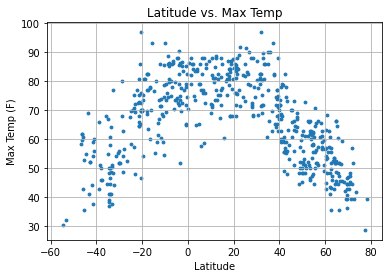

In [42]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], s=8,)
plt.grid(True)

plt.title("Latitude vs. Max Temp")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")

plt.savefig("../output_data/Fig1")


## Latitude vs. Humidity Plot

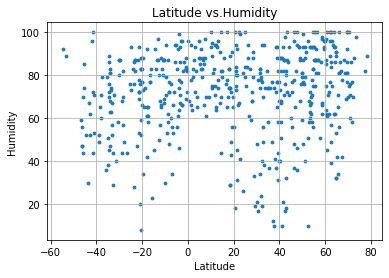

In [47]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], s=8,)
plt.grid(True)

plt.title("Latitude vs.Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.savefig("../output_data/Fig2")


## Latitude vs. Cloudiness Plot

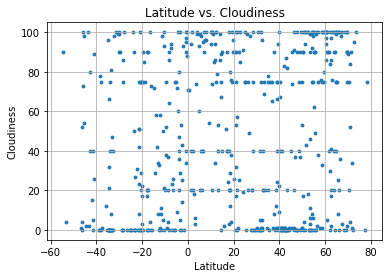

In [48]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], s=8,)
plt.grid(True)

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.savefig("../output_data/Fig3")

## Latitude vs. Wind Speed Plot

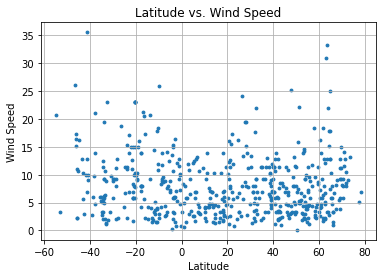

In [50]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], s=8,)
plt.grid(True)

plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.savefig("../output_data/Fig4")

## Linear Regression

In [63]:
# corr= st.pearsonr(x,y)
# print(f"The correlation between both factors is {round(corr[0],2)}")


# (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
# regress_values = x * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x,y)
# plt.plot(x,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")

Northern=weather_df.loc[weather_df['Lat']>0]
Southern=weather_df.loc[weather_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.8


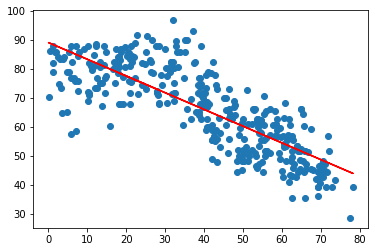

In [64]:
x1=Northern['Lat']
y1=Northern['Max Temp']

corr= st.pearsonr(x1,y1)
print(f"The correlation between both factors is {round(corr[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regress_values = x1 * slope + intercept
line_eq = "y1 = " + str(round(slope,2)) + "x1 + " + str(round(intercept,2))
plt.scatter(x1,y1)
plt.plot(x1,regress_values,"r-")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x1=Northern['Lat']
y1=Northern['Max Temp']

corr= st.pearsonr(x1,y1)
print(f"The correlation between both factors is {round(corr[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regress_values = x1 * slope + intercept
line_eq = "y1 = " + str(round(slope,2)) + "x1 + " + str(round(intercept,2))
plt.scatter(x1,y1)
plt.plot(x1,regress_values,"r-")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression